In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##import seaborn as sns
import numpy as np
from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Preparation

## Retrive

In [34]:
# Reading Accounts' Data
accout = pd.read_csv("./dados/account.csv", sep=";")

# Reading Transactions' Data
trans = pd.read_csv("./dados/trans_dev.csv", sep=";");

# Reading Loans' Data
loan = pd.read_csv("./dados/loan_dev.csv", sep=";");

# Reading Districts' Client and Account Data
cli_demo_acc = pd.read_csv("./dados_tratados/client_demo_account.csv", sep=",");

# Reading Disponents' and Cards' Data
disp_card = pd.read_csv("./dados_limpos/disp_credit.csv", sep=";");





## Merging All dfs togheter 

In [35]:
# Merging Accounts' and Transactions' Data

all_data_df = pd.merge(accout, pd.DataFrame(trans.groupby('account_id').size(), columns=['# trans']), right_index=True, left_on='account_id', how="outer")



##### Changing some collums on the transactions table

In [36]:
# Oper 1 - credit in cash, Oper 2 - credit card withdrawal, Oper 3 - collection from another bank, Oper 4 - remittance to another bank, Oper 5 - withdrawal in cash
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='credit in cash'].groupby('account_id').size(), columns=['oper #1']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='credit card withdrawal'].groupby('account_id').size(), columns=['oper #2']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='collection from another bank'].groupby('account_id').size(), columns=['oper #3']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='remittance to another bank'].groupby('account_id').size(), columns=['oper #4']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='withdrawal in cash'].groupby('account_id').size(), columns=['oper #5']), right_index=True, left_on='account_id', how="outer")

# Type 1 - withdrawal, Type 2 - withdrawal in cash, Type 3 - credit 

all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['type']=='withdrawal'].groupby('account_id').size(), columns=['type #1']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['type']=='withdrawal in cash'].groupby('account_id').size(), columns=['type #2']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['type']=='credit'].groupby('account_id').size(), columns=['type #3']), right_index=True, left_on='account_id', how="outer")

all_data_df = pd.merge(all_data_df, pd.DataFrame(trans.groupby('account_id').amount.mean().round(2)).rename(columns={'amount':'avg trans amount'}), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans.groupby('account_id').balance.mean().round(2)).rename(columns={'balance':'avg trans balance'}), right_index=True, left_on='account_id', how="outer")


In [37]:
all_data_df = pd.merge(all_data_df, loan.rename(columns={'date': 'loan date', 'amount': 'loan amount', 'duration': 'loan duration (mths)', 'payments': 'loan payments', 'status': 'loan status'}))
all_data_df.merge(cli_demo_acc)


,account_id,district_id,frequency,date,# trans,oper #1,oper #2,oper #3,oper #4,oper #5,type #1,type #2,type #3,avg trans amount,avg trans balance,loan_id,loan date,loan amount,loan duration (mths),loan payments,loan status,disp_id,client_id,type,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,average salary,crime_increase,unemployment_increase,crime_avg,unemployment_avg
0,5270,44,monthly issuance,930113,53.0,1.0,NaN,11.0,NaN,31.0,28.0,3.0,22.0,17600.36,69954.57,6077,931122,79608,24,3317,1,6367,6367,OWNER,m,29,25-40,105606,53.0,8254,1.51,0.97,21.26,3.27
1,11265,15,monthly issuance,930114,43.0,14.0,NaN,NaN,8.0,14.0,22.0,NaN,21.0,3714.90,22198.18,7284,930915,52788,12,4399,1,13537,13845,OWNER,m,26,25-40,58796,51.9,9045,0.58,0.47,31.67,3.37
2,10364,55,monthly issuance,930117,45.0,12.0,NaN,NaN,5.0,19.0,24.0,NaN,21.0,5957.54,34272.21,7121,931110,21924,36,609,1,12446,12754,OWNER,m,39,25-40,157042,33.9,8743,1.50,0.55,24.05,2.16
3,10364,55,monthly issuance,930117,45.0,12.0,NaN,NaN,5.0,19.0,24.0,NaN,21.0,5957.54,34272.21,7121,931110,21924,36,609,1,12447,12755,DISPONENT,f,40,25-40,157042,33.9,8743,1.50,0.55,24.05,2.16
4,3834,54,monthly issuance,930119,171.0,29.0,NaN,NaN,61.0,62.0,123.0,NaN,48.0,3618.33,23771.97,5754,940928,23052,12,1921,1,4620,4620,OWNER,f,59,25-50,387570,100.0,9897,-0.06,0.36,48.27,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,9510,1,monthly issuance,960609,20.0,8.0,NaN,NaN,NaN,7.0,7.0,NaN,13.0,7186.86,41402.13,6940,961122,228276,36,6341,1,11402,11710,DISPONENT,f,32,25-40,1204953,100.0,12541,11.15,0.14,76.68,0.36
328,7926,69,weekly issuance,960609,19.0,9.0,NaN,NaN,NaN,7.0,7.0,NaN,12.0,14769.10,56910.69,6613,960922,84120,24,3505,1,9490,9798,OWNER,f,49,40-50,42821,48.4,8173,0.00,0.00,31.71,7.01
329,4447,62,monthly issuance,960616,26.0,9.0,NaN,NaN,NaN,13.0,12.0,1.0,13.0,15435.06,62590.42,5886,961031,192744,36,5354,1,5364,5364,OWNER,m,35,25-40,145688,40.7,8544,1.28,0.57,19.30,1.58
330,4447,62,monthly issuance,960616,26.0,9.0,NaN,NaN,NaN,13.0,12.0,1.0,13.0,15435.06,62590.42,5886,961031,192744,36,5354,1,5365,5365,DISPONENT,f,28,25-40,145688,40.7,8544,1.28,0.57,19.30,1.58


#### Export to CSV

In [38]:

all_data_df.head()
all_data_df.to_csv("dados_tratados/all_data.csv", index=False, float_format="%.2f")


### Data Analysis

In [40]:
all_data_df['frequency'].describe()

count                  328
unique                   3
top       monthly issuance
freq                   259
Name: frequency, dtype: object

<AxesSubplot:>

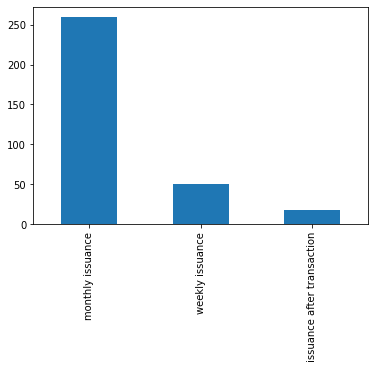

In [41]:
all_data_df['frequency'].value_counts().plot(kind='bar')

Remove the Frequency??? Since most of the payments are monthly issuance? 